프로젝트 수행 방법
---
이번 프로젝트에서 사용할 데이터 이름은 fraud.csv입니다.

신용카드 이상감지 모델을 만들기 위한 데이터이며, is_fraud가 사기거래 여부를 나타내는 변수입니다.

Day 1, 2, 3에서 배운 내용을 모두 동원하여, 최종적으로 사기거래 여부를 예측하기 위한 데이터를 준비해보세요.

만약 이전에 배웠던 내용이 익숙하지 않다면 이전 노드를 다시 한번 복습해 주세요. 🤗

-----

Step 1. 이것만큼은 꼭 해보세요!

프로젝트에 정답은 없습니다. 배우신 내용을 토대로 자유롭게 데이터를 정제/변환하시되, 아래 내용만큼은 반드시 실습해봅시다.
사기거래 여부를 예측하는 데 불필요한 컬럼을 제거합니다.

최소 2개 이상의 새로운 피처(변수)를 생성해봅시다.

[힌트] 구매 금액, 시간 등의 변수를 이용할 수 있습니다.

----

Step 2. 이런것도 해볼 수 있어요!

자유롭게 실습을 해보시고, 여유가 되면 아래의 내용도 실습해보세요.

강의의 범위를 벗어나는 개념이 필요할 수 있으니, 인터넷 검색도 적극 활용해보세요.

데이터의 위도/경도 정보를 활용해볼 수 있을까요?

통계적 관점으로 접근하여 유용한 변수를 만들어낼 수 있을까요?

----

학습목표

 - 컬럼 이름의 변경이 명확하게 반영되어 있고, 다양한 방법으로 효과적인 결측치 처리를 진행할 수 있는가?
 - 데이터 안의 이상치를 감지하고, 이를 적절하게 수정할 수 있는가?
 - 주어진 변수에서 추가적인 변수를 생성해 낼 수 있는가?

평가기준
 - 컬럼 이름의 변경이 명확하게 반영되어 있고, 다양한 방법으로 효과적인 결측치 처리를 진행할수 있는가?
 - 데이터의 이상치를 감지하여 수정하고 수정후 데이터의 일관성이 유지되며 품질 또한 향상 되었는가?
 - 추가적인 변수를 창의적으로 생성하고 유용하게 데이터 분석에 기여 하였는가?

# Project : 신용거래 이상탐지 데이터 다루기
---
### 데이터셋 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('C:/Users/허재민/Desktop/새 폴더/아비/fraud.csv')
df_1 = df

In [3]:
pd.set_option('display.max_columns', 50)

### 기본 데이터 구조 확인 

In [4]:
df_1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [6]:
df_1.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


### 변수명 및 변수 유형 파악

## 

| 변수명                   | 의미                 | 변수 유형 (모델링 관점) |
| --------------------- | ------------------ | -------------- |
| trans_date_trans_time | 거래 발생 날짜 및 시간      | 날짜형 (Datetime) |
| cc_num                | 신용카드 번호            | 식별자 (ID, 범주형)  |
| merchant              | 가맹점 이름             | 범주형            |
| category              | 가맹점 업종             | 범주형            |
| amt                   | 거래 금액              | 수치형 (연속형)      |
| first                 | 고객 이름              | 식별자 (텍스트)      |
| last                  | 고객 성               | 식별자 (텍스트)      |
| gender                | 성별                 | 범주형            |
| street                | 도로명 주소             | 텍스트            |
| city                  | 도시                 | 범주형            |
| state                 | 주(州)               | 범주형            |
| zip                   | 우편번호               | 범주형            |
| lat                   | 고객 거주지 위도          | 수치형 (연속형)      |
| long                  | 고객 거주지 경도          | 수치형 (연속형)      |
| city_pop              | 도시 인구수             | 수치형 (연속형)      |
| job                   | 직업                 | 범주형            |
| dob                   | 생년월일               | 날짜형            |
| trans_num             | 거래 고유 번호           | 식별자 (ID)       |
| unix_time             | 유닉스 시간 (초 단위 시간값)  | 수치형 (시간 파생 가능) |
| merch_lat             | 가맹점 위도             | 수치형 (연속형)      |
| merch_long            | 가맹점 경도             | 수치형 (연속형)      |
| is_fraud              | 사기 여부 (0=정상, 1=사기) | 이진 범주형 (타겟 변수) |


### 타겟 변수 비율 확인

In [7]:
total_count = len(df_1)
fraud_count = df_1['is_fraud'].sum()
fraud_ratio = df_1['is_fraud'].mean() * 100

print(f"전체 거래 건수: {total_count}건")
print(f"사기 거래 건수: {fraud_count}건")
print(f"사기 거래 비율: {fraud_ratio:.2f}%")

전체 거래 건수: 491134건
사기 거래 건수: 1244건
사기 거래 비율: 0.25%


### 결측치 확인

- 확인 결과 없음

In [8]:
df_1.isnull().mean()

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

### 중복 데이터 확인

- 확인 결과 없음

In [9]:
df_1.duplicated().sum()

np.int64(0)

### 이상치 데이터 확인

- 수치형 변수 이상치 확인

In [10]:
df_1.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


- 범주형 변수 이상치 확인

In [11]:
df_1['gender'].value_counts()

gender
F    352445
M    138689
Name: count, dtype: int64

In [12]:
df_1['state'].nunique()

44

In [13]:
df_1['category'].nunique()

14

In [14]:
df_1['category'].value_counts()

category
shopping_pos      48345
gas_transport     46029
home              43340
grocery_pos       42722
kids_pets         40295
shopping_net      39179
food_dining       35980
personal_care     35513
entertainment     33619
misc_pos          32411
health_fitness    31415
misc_net          25179
grocery_net       24486
travel            12621
Name: count, dtype: int64

In [15]:
df_1['job'].nunique()

110

#### 생년월일 -> 나이 변수로 변경 및 이상치 확인

- min = 14살 
- max = 50살 

-> 신용거래상 14살은 이상치로 판단 했지만 타겟변수의 비율이 비슷한 관계로 미성년자 신용거래에 대한 데이터는 유지

In [16]:
# 날짜형으로 변환
df_1['trans_date_trans_time'] = pd.to_datetime(df_1['trans_date_trans_time'])
df_1['dob'] = pd.to_datetime(df_1['dob'])

# 나이 계산 (정확한 만 나이)
df_1['age'] = df_1['trans_date_trans_time'].dt.year - df_1['dob'].dt.year - (
    (df_1['trans_date_trans_time'].dt.month < df_1['dob'].dt.month) |
    ((df_1['trans_date_trans_time'].dt.month == df_1['dob'].dt.month) &
     (df_1['trans_date_trans_time'].dt.day < df_1['dob'].dt.day))
)


In [17]:
df_1['age'].describe()

count    491134.000000
mean         34.646488
std           9.291850
min          14.000000
25%          27.000000
50%          35.000000
75%          43.000000
max          50.000000
Name: age, dtype: float64

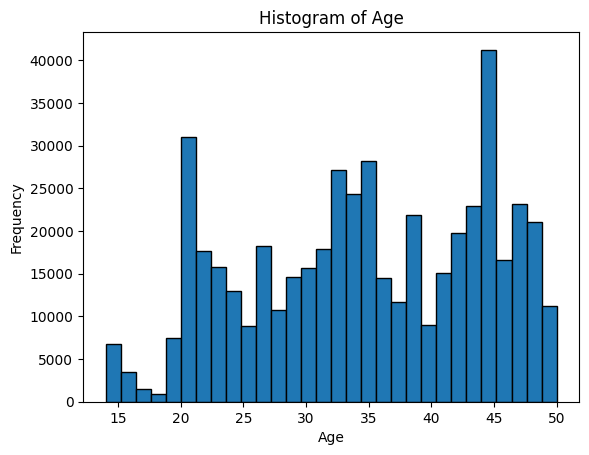

In [18]:
plt.figure()
plt.hist(df_1['age'], bins=30, edgecolor='black', linewidth=1)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [19]:
df_1[df_1['age'] < 18]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
29,2019-01-01 01:50:26,3541160328600277,fraud_Funk Group,grocery_net,55.81,Jason,Singh,M,4720 Anna Ways,Murrayville,IL,62668,39.5723,-90.2379,1512,Commercial/residential surveyor,2003-05-07,6ba46336972d5dbe7a38ffb214d9803e,1325382626,39.575819,-90.149623,0,15
44,2019-01-01 03:04:28,4587657402165341815,fraud_Hills-Olson,grocery_net,25.89,Amber,Lewis,F,6296 John Keys Suite 858,Pembroke Township,IL,60958,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,76c33ab500644d7795159d1a0eaa243c,1325387068,40.888445,-87.409615,0,14
45,2019-01-01 03:10:00,4587657402165341815,fraud_Friesen-D'Amore,gas_transport,77.59,Amber,Lewis,F,6296 John Keys Suite 858,Pembroke Township,IL,60958,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,24bc3a291efe739d2f801fdc487ee3f2,1325387400,41.818260,-88.129609,0,14
179,2019-01-01 12:29:30,3576021480694169,fraud_Hickle Group,shopping_pos,9.19,Dawn,Gray,F,9486 Joel Common Suite 554,Topeka,KS,66618,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,91561e65399053586ad098022374ec45,1325420970,38.949619,-95.471502,0,14
236,2019-01-01 14:12:15,3541160328600277,fraud_Kerluke PLC,misc_net,45.69,Jason,Singh,M,4720 Anna Ways,Murrayville,IL,62668,39.5723,-90.2379,1512,Commercial/residential surveyor,2003-05-07,759aed1f81d232f2e22fa02d8047950b,1325427135,40.402416,-89.836153,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490975,2020-12-31 21:15:45,3576021480694169,"fraud_Hahn, Douglas and Schowalter",travel,7.05,Dawn,Gray,F,9486 Joel Common Suite 554,Topeka,KS,66618,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,27e1936c706a540dd71589d2aa2adedc,1388524545,39.998111,-95.452864,0,16
490993,2020-12-31 21:40:08,3576021480694169,fraud_Schmitt Ltd,misc_net,2.91,Dawn,Gray,F,9486 Joel Common Suite 554,Topeka,KS,66618,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,21b9e6020f6eda23f0c013b8a4d9715a,1388526008,38.519571,-96.429821,0,16
491033,2020-12-31 22:13:47,3576021480694169,fraud_Wilkinson Ltd,entertainment,4.88,Dawn,Gray,F,9486 Joel Common Suite 554,Topeka,KS,66618,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,0a2fa6c6889fc13066286a1385546f06,1388528027,39.906783,-94.914010,0,16
491075,2020-12-31 22:54:39,4587657402165341815,fraud_Haley Group,misc_pos,111.34,Amber,Lewis,F,6296 John Keys Suite 858,Pembroke Township,IL,60958,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,20020cbed5388cceffc69289bbe6d3f2,1388530479,41.534827,-87.779693,0,16


In [20]:
df_1[df_1['age'] == 14][['dob','trans_date_trans_time','age']]

,dob,trans_date_trans_time,age
44,2004-05-08,2019-01-01 03:04:28,14
45,2004-05-08,2019-01-01 03:10:00,14
179,2004-12-30,2019-01-01 12:29:30,14
246,2004-05-08,2019-01-01 14:22:33,14
261,2004-05-08,2019-01-01 14:54:40,14
...,...,...,...
241694,2004-12-30,2019-12-29 19:08:01,14
241818,2004-12-30,2019-12-29 20:26:43,14
242006,2004-12-30,2019-12-29 22:06:48,14
242038,2004-12-30,2019-12-29 22:29:34,14


In [21]:
df_1[df_1['age'] < 18]['is_fraud'].mean()

np.float64(0.002654109589041096)

In [22]:
df_1[df_1['age'] >= 18]['is_fraud'].mean()

np.float64(0.0025299611641575624)

### 변수 제거 및 파생변수 생성

- cc_num
- trans_num
- zip
- dob

In [23]:
# df_1.drop(columns=['cc_num', 'trans_num', 'zip', 'dob'], inplace=True)
df_1['hour'] = df_1['trans_date_trans_time'].dt.hour

In [24]:
df_1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,hour
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,38,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,44,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,47,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,41,0


### 이변량 분석

### 수치형

- amt
- age
- city_pop
- hour

In [25]:
df_1.groupby('is_fraud')[['amt', 'age', 'city_pop', 'hour']].mean()

,amt,age,city_pop,hour
is_fraud,,,,
0,68.011761,34.648648,121497.939668,14.129580
1,477.958328,33.795820,79763.713023,11.565916


In [26]:
df_1.groupby('is_fraud')[['amt', 'age', 'city_pop', 'hour']].median()

,amt,age,city_pop,hour
is_fraud,,,,
0,42.08,35.0,5760.0,15.0
1,334.75,34.0,4542.0,8.5


<Axes: title={'center': 'amt'}, xlabel='is_fraud'>

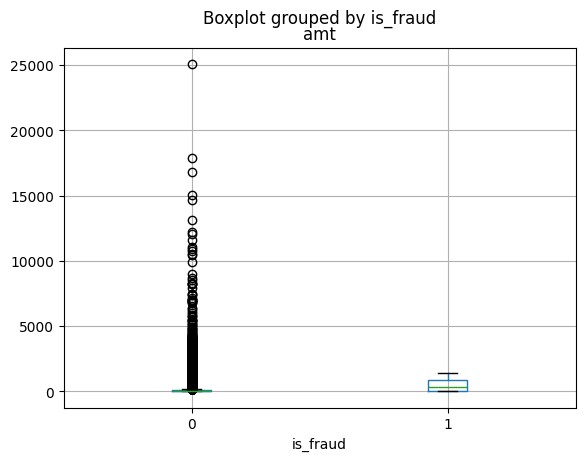

In [27]:
df_1.boxplot(column='amt', by='is_fraud')

<Axes: title={'center': 'age'}, xlabel='is_fraud'>

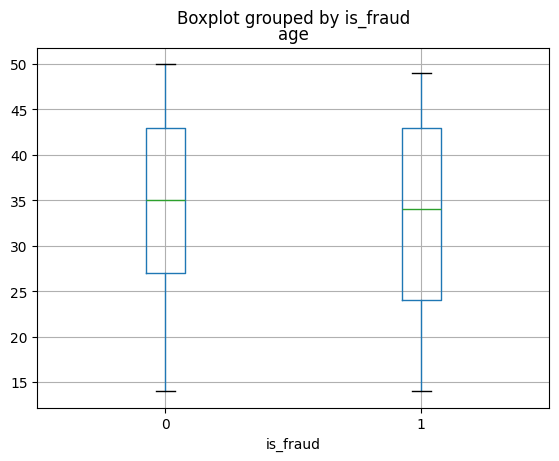

In [28]:
df_1.boxplot(column='age', by='is_fraud')

<Axes: title={'center': 'city_pop'}, xlabel='is_fraud'>

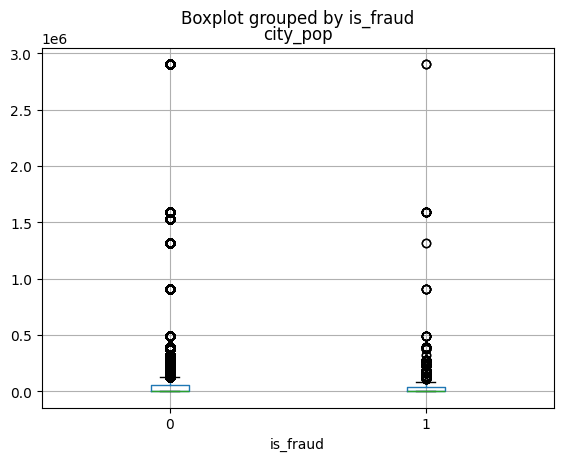

In [29]:
df_1.boxplot(column='city_pop', by='is_fraud')

<Axes: title={'center': 'hour'}, xlabel='is_fraud'>

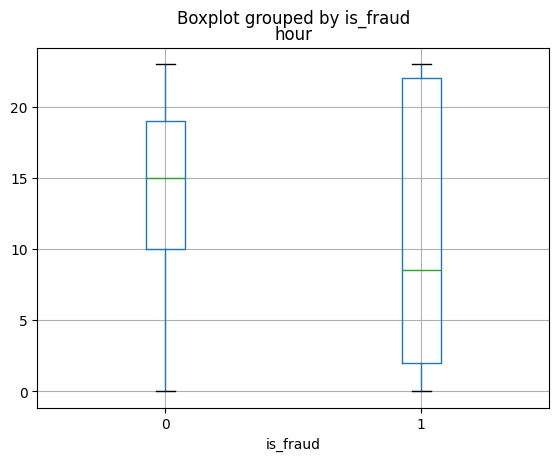

In [30]:
df_1.boxplot(column='hour', by='is_fraud')

### amt변수 로그 변환 

In [31]:
df_1['amt_log'] = np.log(df_1['amt'] + 1)

<Figure size 640x480 with 0 Axes>

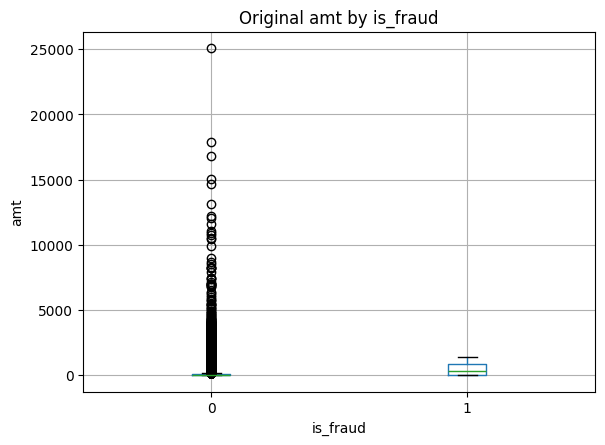

In [32]:
plt.figure()
df_1.boxplot(column='amt', by='is_fraud')
plt.suptitle('')
plt.title('Original amt by is_fraud')
plt.xlabel('is_fraud')
plt.ylabel('amt')
plt.show()

<Figure size 640x480 with 0 Axes>

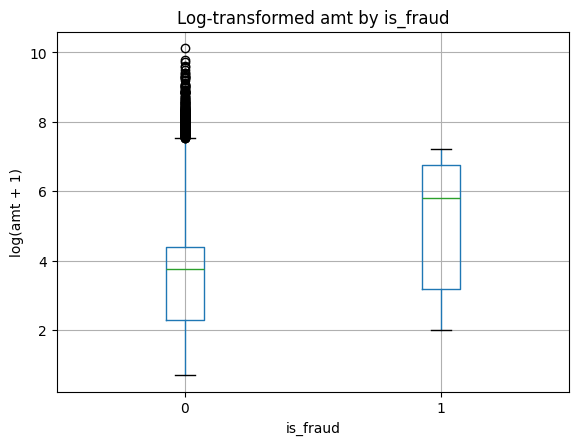

In [33]:
plt.figure()
df_1.boxplot(column='amt_log', by='is_fraud')
plt.suptitle('')
plt.title('Log-transformed amt by is_fraud')
plt.xlabel('is_fraud')
plt.ylabel('log(amt + 1)')
plt.show()

### 저카디널리티 범주형 (고카디널리티 범주형 = 베이스라인 모델링 구축 후 인코딩 예정)

- gender
- category

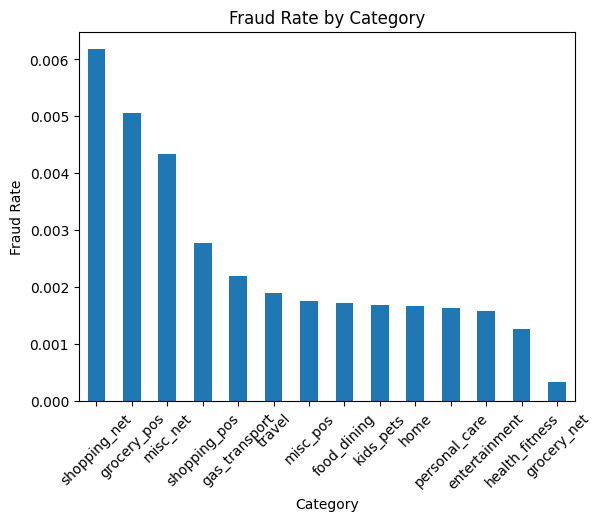

In [34]:
category_fraud_rate = df_1.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
plt.figure()
category_fraud_rate.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Category')
plt.xticks(rotation=45)
plt.show()

In [35]:
gender_fraud_rate = df_1.groupby('gender')['is_fraud'].mean()

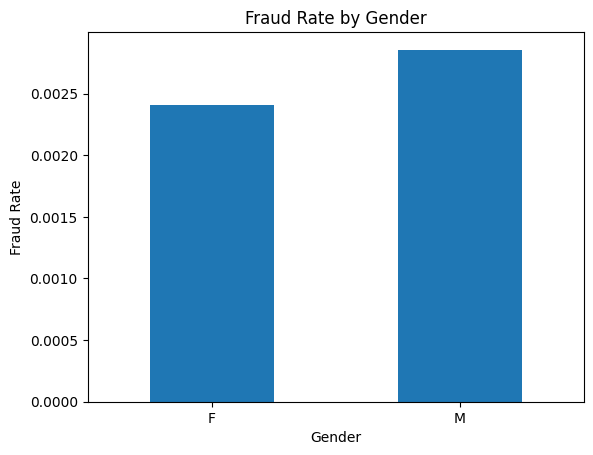

In [36]:
plt.figure()
gender_fraud_rate.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Gender')
plt.xticks(rotation=0)
plt.show()

## 이변량 분석 결론

amt(금액)과 hour(시간대) 그리고 category(가맹업종)의 영향이 순서대로 크다는걸 확인했다 

## 베이스라인 모델 (로지스틱 회귀)

In [37]:
features = ['amt_log', 'hour', 'age', 'city_pop', 'category', 'gender']
X = df_1[features]
y = df_1['is_fraud']

### 로지스틱 회귀모델 이므로 One-Hot Encoding을 해준다.(다중공선성 방지를 위해 drop_first사용)

In [38]:
X = pd.get_dummies(X, columns=['category', 'gender'], drop_first=True)

### Train/Test 분리 

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


### 모델 학습

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [41]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [42]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("PR-AUC:", average_precision_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82     97978
           1       0.01      0.71      0.01       249

    accuracy                           0.70     98227
   macro avg       0.50      0.71      0.42     98227
weighted avg       1.00      0.70      0.82     98227

ROC-AUC: 0.8051371830788011
PR-AUC: 0.05495389924947805


- 사기 71%를 잡아냄
- 잡았다고 한 것 중 1%만 진짜 사기
- 오탐률이 높은 이유는 엄청 불균형한 데이터이기 때문에 이런 결과가 나왔음

In [43]:
threshold = 0.9
y_pred_adj = (y_prob > threshold).astype(int)

In [44]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

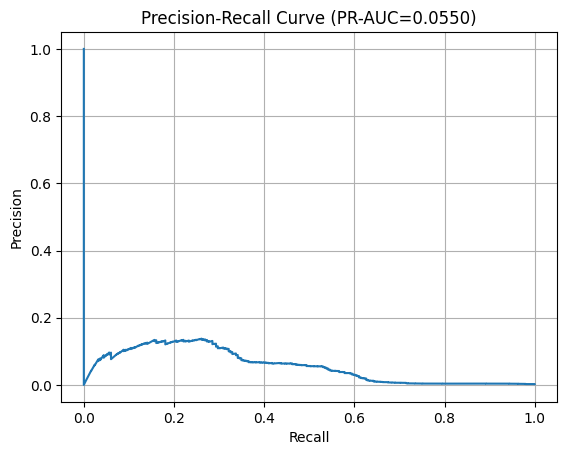

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# y_test: 실제값, y_prob: 모델이 예측한 확률(1일 확률)
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

plt.figure()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (PR-AUC={ap:.4f})')
plt.grid(True)
plt.show()

In [46]:
import numpy as np

f1 = 2 * (precision * recall) / (precision + recall + 1e-12)
best_idx = np.argmax(f1)
best_threshold = thresholds[best_idx-1]  # thresholds는 길이가 하나 짧음

print("Best F1:", f1[best_idx])
print("Best threshold:", best_threshold)
print("Precision at best:", precision[best_idx])
print("Recall at best:", recall[best_idx])


Best F1: 0.18030513176099028
Best threshold: 0.8518865021475198
Precision at best: 0.13771186440677965
Recall at best: 0.26104417670682734


기본 threshold 0.5일 때:

Recall ≈ 0.71

Precision ≈ 0.01

Threshold 0.85일 때:

Recall ≈ 0.26

Precision ≈ 0.14

## 베이스라인 모델 (랜덤 포레스트)

In [47]:
features = ['amt_log', 'hour', 'age', 'city_pop', 'category', 'gender']
X = df_1[features]
y = df_1['is_fraud']

In [48]:
from sklearn.model_selection import GroupShuffleSplit

features = ['amt_log','hour','age','city_pop','category','gender']
X = df_1[features]
y = df_1['is_fraud']
groups = df_1['cc_num']

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

categorical = ['category', 'gender']
numerical = ['amt_log', 'hour', 'age', 'city_pop']

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('num', 'passthrough', numerical)
    ]
)

rf = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced_subsample'
)

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('rf', rf)
])

model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [50]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("PR-AUC:", average_precision_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96793
           1       0.91      0.54      0.68       256

    accuracy                           1.00     97049
   macro avg       0.96      0.77      0.84     97049
weighted avg       1.00      1.00      1.00     97049

ROC-AUC: 0.9696367788411868
PR-AUC: 0.7776591353682334


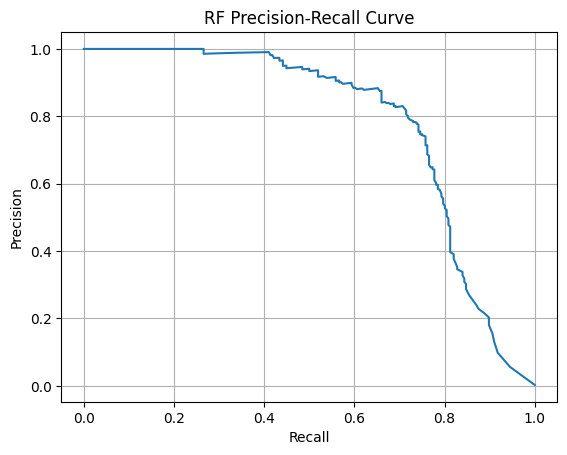

Best F1: 0.7637130801682795
Best threshold: 0.2875
Precision at best: 0.8302752293577982
Recall at best: 0.70703125


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RF Precision-Recall Curve')
plt.grid(True)
plt.show()

# Best F1 threshold
f1 = 2 * (precision * recall) / (precision + recall + 1e-12)
best_idx = np.argmax(f1)
best_threshold = thresholds[best_idx-1]

print("Best F1:", f1[best_idx])
print("Best threshold:", best_threshold)
print("Precision at best:", precision[best_idx])
print("Recall at best:", recall[best_idx])

기본 threshold 0.5일 때:

Recall ≈ 0.54

Precision ≈ 0.91

Threshold 0.85일 때:

Recall ≈ 0.70

Precision ≈ 0.83

회귀 모델보다 트리모델에서 성능이 우수한것을 확인 했다.

## Feature Importance

In [52]:
preprocess = model.named_steps['preprocess']
rf = model.named_steps['rf']

In [53]:
categorical = ['category', 'gender']
numerical = ['amt_log', 'hour', 'age', 'city_pop']

# 원핫 인코더 꺼내기
ohe = preprocess.named_transformers_['cat']

# 원핫된 컬럼명 얻기 (예: category_shopping_net, gender_M ...)
ohe_feature_names = ohe.get_feature_names_out(categorical)

# 최종 피처 이름 = [원핫 피처들] + [수치 피처들]
feature_names = list(ohe_feature_names) + numerical

In [54]:
importances = rf.feature_importances_

fi = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

fi.head(20)

,feature,importance
16,amt_log,0.544607
17,hour,0.218687
19,city_pop,0.043432
18,age,0.041584
2,category_gas_transport,0.022080
1,category_food_dining,0.021579
11,category_shopping_net,0.014801
4,category_grocery_pos,0.010694
12,category_shopping_pos,0.010149
6,category_home,0.009595


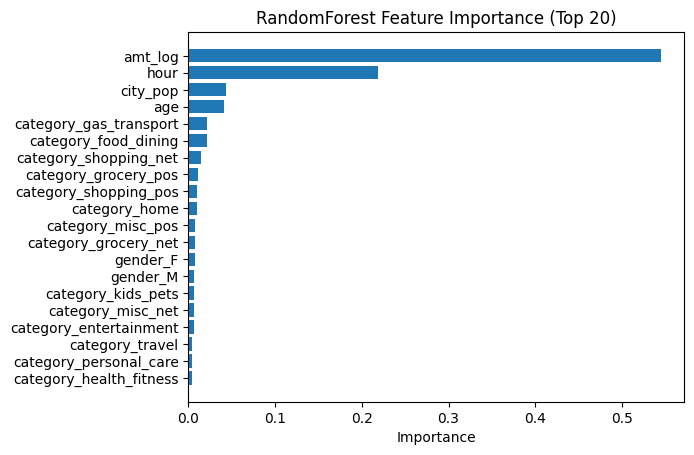

In [55]:
import matplotlib.pyplot as plt

top_n = 20
fi_top = fi.head(top_n)

plt.figure()
plt.barh(fi_top['feature'][::-1], fi_top['importance'][::-1])
plt.xlabel('Importance')
plt.title(f'RandomForest Feature Importance (Top {top_n})')
plt.show()

In [56]:
fi['group'] = fi['feature'].str.split('_', n=1).str[0]  # category / gender / amt_log 등
group_fi = fi.groupby('group')['importance'].sum().sort_values(ascending=False)
group_fi

group
amt         0.544607
hour        0.218687
category    0.137190
city        0.043432
age         0.041584
gender      0.014501
Name: importance, dtype: float64

## Feature Engineering

- 위도/경도 거리순으로만 따지면 쉽지만 gpt가 위도/경도로 “거리”를 계산할 때는 지구가 둥글다는 점을 반영하는 Haversine 공식을 쓰는 게 더 정확하다고 이게 학습목표에 있던 강의의 범위를 벗어나는 개념 인듯... distance_km	와 distance 차이가 실제로 꽤 차이가 난다

In [60]:
# 위도/경도를 라디안으로 변환
lat1 = np.radians(df_1['lat'])
lon1 = np.radians(df_1['long'])
lat2 = np.radians(df_1['merch_lat'])
lon2 = np.radians(df_1['merch_long'])

# 차이
dlat = lat2 - lat1
dlon = lon2 - lon1

# Haversine 공식
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arcsin(np.sqrt(a))

R = 6371  # 지구 반지름 (km)

df_1['distance_km'] = R * c

In [61]:
df_1['distance'] = np.sqrt(
    (df_1['lat'] - df_1['merch_lat'])**2 +
    (df_1['long'] - df_1['merch_long'])**2
)

카드 평균 대비 금액 비율 변수

In [63]:
df_1['card_mean_amt'] = df_1.groupby('cc_num')['amt'].transform('mean')
df_1['amt_ratio'] = df_1['amt'] / (df_1['card_mean_amt'] + 1)

In [64]:
df_1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,hour,amt_log,distance_km,distance,card_mean_amt,amt_ratio
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40,0,4.684259,30.212176,0.272310,56.078113,1.878654
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,38,0,3.822317,84.702120,0.862420,59.858059,0.734660
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,44,0,3.856087,67.847742,0.622027,87.328067,0.523956
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,47,0,4.175771,22.303906,0.239327,64.317839,0.981202
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,41,0,3.280159,79.591943,0.730752,90.747123,0.278810


성능차이 비교 

In [66]:
drop_cols = [
    'cc_num',
    'first',
    'last',
    'street',
    'trans_num',
    'card_mean_amt',
    'distance',
    'amt',
    'dob'
]

df_model = df_1.drop(columns=drop_cols)
df_model.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'gender', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age', 'hour', 'amt_log',
       'distance_km', 'amt_ratio'],
      dtype='object')

In [67]:
features = [
    'amt_log',
    'amt_ratio',
    'distance_km',
    'hour',
    'age',
    'city_pop',
    'category'
]

X = df_model[features]
y = df_model['is_fraud']

In [68]:
groups = df_1['cc_num']

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [69]:
categorical = ['category']
numerical = ['amt_log','amt_ratio','distance_km','hour','age','city_pop']

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('num', 'passthrough', numerical)
    ]
)

rf = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced_subsample'
)

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('rf', rf)
])

model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [70]:
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("PR-AUC:", average_precision_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96793
           1       0.93      0.52      0.67       256

    accuracy                           1.00     97049
   macro avg       0.96      0.76      0.83     97049
weighted avg       1.00      1.00      1.00     97049

ROC-AUC: 0.97370443562551
PR-AUC: 0.7723147467952387


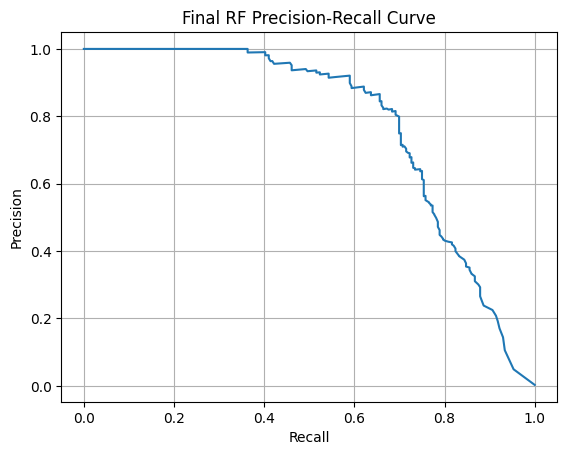

Best F1: 0.7484143763208566
Best threshold: 0.2625
Precision at best: 0.815668202764977
Recall at best: 0.69140625


In [71]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Final RF Precision-Recall Curve')
plt.grid(True)
plt.show()

# Best F1 threshold
f1 = 2 * (precision * recall) / (precision + recall + 1e-12)
best_idx = np.argmax(f1)
best_threshold = thresholds[best_idx-1]

print("Best F1:", f1[best_idx])
print("Best threshold:", best_threshold)
print("Precision at best:", precision[best_idx])
print("Recall at best:", recall[best_idx])

처음 베이스라인모델에 채택했던 amt hour category부분 변수의 영향력이 커서 파생변수를 만들어도 성능에 영향을 미치지 못했다 선형회귀보다 트리기반의 모델링이 적합하다는 결과만 얻은 프로젝트였다.